In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
data_o = pd.read_csv("spotify-2023.csv", encoding='ISO-8859-1')
data_o

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


# Preprocessing

In [3]:
data = data_o.copy().drop(["artist(s)_name", "artist_count", "released_year", "released_month", "released_day", "in_spotify_playlists", "in_spotify_charts", "streams", "in_apple_playlists", "in_apple_charts", "in_deezer_playlists", "in_deezer_charts", "in_shazam_charts"], axis = 1)
data = data.dropna().reset_index(drop=True)

In [4]:
data

,track_name,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),125,B,Major,80,89,83,31,0,8,4
1,LALA,92,C#,Major,71,61,74,7,0,10,4
2,vampire,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...
853,My Mind & Me,144,A,Major,60,24,39,57,0,8,3
854,Bigger Than The Whole Sky,166,F#,Major,42,7,24,83,1,12,6
855,A Veces (feat. Feid),92,C#,Major,80,81,67,4,0,8,6
856,En La De Ella,97,C#,Major,82,67,77,8,0,12,5


In [5]:
np.unique(data["key"].astype(str))

array(['A', 'A#', 'B', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#'],
      dtype=object)

In [6]:
key_mapping = {'C#': 1, 'D': 2, 'D#': 3, 'E': 4, 'F': 5, 'F#': 6, 'G': 7, 'G#': 8, 'A': 9, 'A#': 10, 'B': 11}

data["key"] = data["key"].map(key_mapping)

In [7]:
np.unique(data["key"])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [8]:
np.unique(data["mode"])

array(['Major', 'Minor'], dtype=object)

In [9]:
mode_mapping = {'Major':0, 'Minor':1}

data["mode"] = data["mode"].map(mode_mapping)

In [10]:
np.unique(data["mode"])

array([0, 1], dtype=int64)

array([[<AxesSubplot:title={'center':'bpm'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'mode'}>],
       [<AxesSubplot:title={'center':'danceability_%'}>,
        <AxesSubplot:title={'center':'valence_%'}>,
        <AxesSubplot:title={'center':'energy_%'}>],
       [<AxesSubplot:title={'center':'acousticness_%'}>,
        <AxesSubplot:title={'center':'instrumentalness_%'}>,
        <AxesSubplot:title={'center':'liveness_%'}>],
       [<AxesSubplot:title={'center':'speechiness_%'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

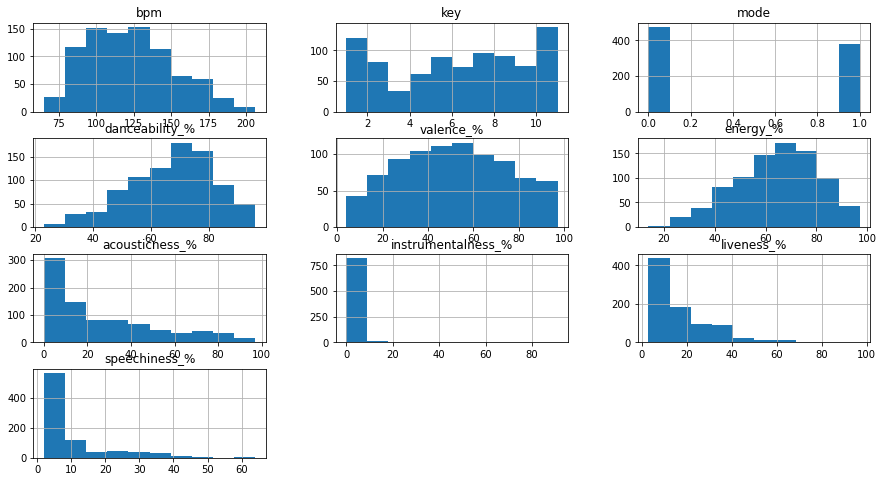

In [11]:
data.hist(figsize=(15, 8))

In [12]:
np.unique(data["instrumentalness_%"], return_counts = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 13, 14, 15, 17, 18, 19,
        20, 23, 24, 25, 27, 30, 33, 35, 41, 42, 44, 46, 47, 51, 63, 72, 83,
        90, 91], dtype=int64),
 array([781,  19,   5,   4,   4,   4,   3,   1,   3,   2,   1,   1,   1,
          1,   1,   3,   1,   1,   1,   2,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   2,   3,   1,   1,   1,   1], dtype=int64))

In [13]:
data["acousticness_%"] = np.log(data["acousticness_%"] + 1)
data["instrumentalness_%"] = np.log(data["instrumentalness_%"] + 1)
data["liveness_%"] = np.log(data["liveness_%"] + 1)
data["speechiness_%"] = np.log(data["speechiness_%"] + 1)

array([[<AxesSubplot:title={'center':'bpm'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'mode'}>],
       [<AxesSubplot:title={'center':'danceability_%'}>,
        <AxesSubplot:title={'center':'valence_%'}>,
        <AxesSubplot:title={'center':'energy_%'}>],
       [<AxesSubplot:title={'center':'acousticness_%'}>,
        <AxesSubplot:title={'center':'instrumentalness_%'}>,
        <AxesSubplot:title={'center':'liveness_%'}>],
       [<AxesSubplot:title={'center':'speechiness_%'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

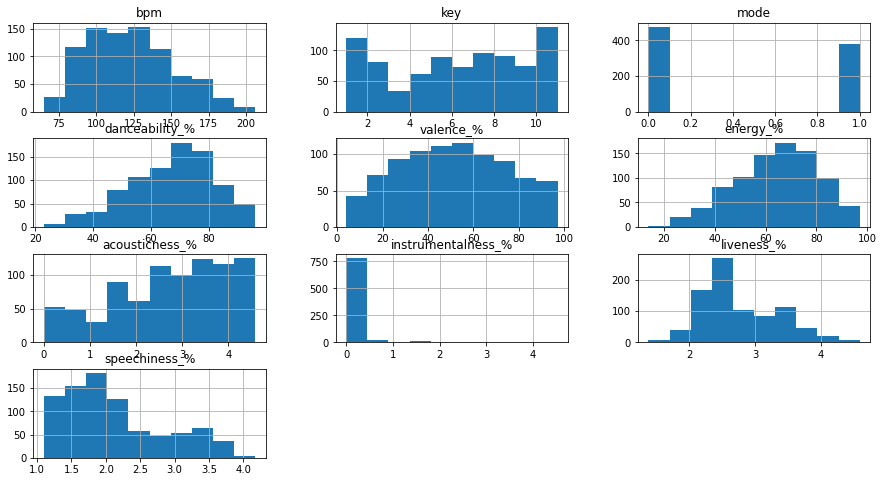

In [14]:
data.hist(figsize=(15, 8))

In [15]:
scaler = StandardScaler()

data_s = data.copy().drop(["track_name", "mode", "key"], axis = 1)
data_s = scaler.fit_transform(data_s)

data_s = pd.DataFrame(data_s, columns=data.columns.difference(["track_name", "mode", "key"]))
data_s["track_name"] = data["track_name"]
data_s["mode"] = data["mode"]
data_s["key"] = data["key"]

data_s

,acousticness_%,bpm,danceability_%,energy_%,instrumentalness_%,liveness_%,speechiness_%,valence_%,track_name,mode,key
0,0.077129,0.870216,1.600987,1.163146,0.592102,-0.270101,-0.983266,-0.781103,Seven (feat. Latto) (Explicit Ver.),0,11
1,-1.094451,0.255637,0.413592,0.601993,-0.503423,-0.270101,-0.637323,-0.781103,LALA,0,1
2,0.538660,-1.110094,-0.816211,-0.707364,0.137418,-0.270101,1.203567,-0.296997,vampire,0,5
3,1.674738,-0.836948,0.286371,0.477292,-0.183003,-0.270101,-0.487320,0.892404,Cruel Summer,0,9
4,0.751675,-0.154082,-1.197873,0.976095,-0.006663,5.405038,-0.487320,-0.296997,WHERE SHE GOES,1,9
...,...,...,...,...,...,...,...,...,...,...,...
853,0.751675,-0.495515,-1.155466,-1.580268,1.062071,-0.270101,-0.983266,-1.102155,My Mind & Me,0,9
854,1.532728,-1.724673,-1.876385,-2.515523,1.354761,0.675755,-0.349332,-0.296997,Bigger Than The Whole Sky,0,6
855,-1.094451,0.870216,1.261731,0.165541,-0.874846,-0.270101,-0.983266,-0.296997,A Veces (feat. Feid),0,1
856,-0.916939,1.006789,0.668033,0.789044,-0.410345,-0.270101,-0.349332,-0.518784,En La De Ella,0,1


In [16]:
columns_to_scale = ['acousticness_%', 'bpm', "danceability_%", "energy_%", "instrumentalness_%", "liveness_%", "speechiness_%", "valence_%"]

scaled_data = data.copy()
data_to_scale = scaled_data[columns_to_scale]

scaler = StandardScaler()
scaled_columns = scaler.fit_transform(data_to_scale)

scaled_data[columns_to_scale] = scaled_columns

In [17]:
scaled_data

,track_name,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),0.077129,11,0,0.870216,1.600987,1.163146,0.592102,-0.270101,-0.983266,-0.781103
1,LALA,-1.094451,1,0,0.255637,0.413592,0.601993,-0.503423,-0.270101,-0.637323,-0.781103
2,vampire,0.538660,5,0,-1.110094,-0.816211,-0.707364,0.137418,-0.270101,1.203567,-0.296997
3,Cruel Summer,1.674738,9,0,-0.836948,0.286371,0.477292,-0.183003,-0.270101,-0.487320,0.892404
4,WHERE SHE GOES,0.751675,9,1,-0.154082,-1.197873,0.976095,-0.006663,5.405038,-0.487320,-0.296997
...,...,...,...,...,...,...,...,...,...,...,...
853,My Mind & Me,0.751675,9,0,-0.495515,-1.155466,-1.580268,1.062071,-0.270101,-0.983266,-1.102155
854,Bigger Than The Whole Sky,1.532728,6,0,-1.724673,-1.876385,-2.515523,1.354761,0.675755,-0.349332,-0.296997
855,A Veces (feat. Feid),-1.094451,1,0,0.870216,1.261731,0.165541,-0.874846,-0.270101,-0.983266,-0.296997
856,En La De Ella,-0.916939,1,0,1.006789,0.668033,0.789044,-0.410345,-0.270101,-0.349332,-0.518784


# Clustering

## K-Means

In [18]:
kmeans = KMeans(n_clusters=40, random_state=1)

scaled_data["cluster"] = kmeans.fit_predict(scaled_data.drop(["track_name"], axis = 1))

In [19]:
np.unique(scaled_data["cluster"], return_counts = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 array([14, 18, 23, 22, 16, 36, 13, 26, 40, 12, 39,  9, 30, 15, 22, 19, 19,
        19, 20, 30, 20, 12, 24, 40, 19, 31, 23, 36, 15, 20, 13, 14, 26, 29,
        18, 11, 20, 10, 12, 23], dtype=int64))

In [20]:
scaled_data

,track_name,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cluster
0,Seven (feat. Latto) (Explicit Ver.),0.077129,11,0,0.870216,1.600987,1.163146,0.592102,-0.270101,-0.983266,-0.781103,3
1,LALA,-1.094451,1,0,0.255637,0.413592,0.601993,-0.503423,-0.270101,-0.637323,-0.781103,7
2,vampire,0.538660,5,0,-1.110094,-0.816211,-0.707364,0.137418,-0.270101,1.203567,-0.296997,5
3,Cruel Summer,1.674738,9,0,-0.836948,0.286371,0.477292,-0.183003,-0.270101,-0.487320,0.892404,12
4,WHERE SHE GOES,0.751675,9,1,-0.154082,-1.197873,0.976095,-0.006663,5.405038,-0.487320,-0.296997,11
...,...,...,...,...,...,...,...,...,...,...,...,...
853,My Mind & Me,0.751675,9,0,-0.495515,-1.155466,-1.580268,1.062071,-0.270101,-0.983266,-1.102155,16
854,Bigger Than The Whole Sky,1.532728,6,0,-1.724673,-1.876385,-2.515523,1.354761,0.675755,-0.349332,-0.296997,20
855,A Veces (feat. Feid),-1.094451,1,0,0.870216,1.261731,0.165541,-0.874846,-0.270101,-0.983266,-0.296997,7
856,En La De Ella,-0.916939,1,0,1.006789,0.668033,0.789044,-0.410345,-0.270101,-0.349332,-0.518784,7


In [21]:
song_name = "Alone"

In [22]:
index_number = scaled_data[scaled_data["track_name"] == song_name].index[0]
selected_datapoint = scaled_data.iloc[[index_number]]
selected_cluster = int(scaled_data.iloc[index_number]['cluster'])
cluster_data = scaled_data[scaled_data['cluster'] == selected_cluster]

distances = np.linalg.norm(selected_datapoint.drop(["track_name"], axis = 1).values - cluster_data.drop(["track_name"], axis = 1).values, axis=1)
closest_indices = distances.argsort()[1:6]
closest_samples = cluster_data.iloc[closest_indices].reset_index(drop=True)

In [23]:
songs = []
artists = []
idx = []

for i in range(len(data_o)):
    if data_o["track_name"][i] in closest_samples["track_name"].values:
        songs.append(data_o["track_name"][i])
        artists.append(data_o["artist(s)_name"][i])
        idx.append(closest_samples[closest_samples["track_name"] == data_o["track_name"][i]].index[0])

rec = sorted(zip(songs, artists, idx), key=lambda x: x[2])

print("Five song recommendations:")
for item in rec:
    print(item[0] + " by " + item[1])

Five song recommendations:
Mirror by Kendrick Lamar
Dakiti by Bad Bunny, Jhay Cortez
Columbia by Quevedo
Take Me To Church by Hozier
Phir Aur Kya Chahiye (From "Zara Hatke Zara Bachke") by Arijit Singh, Sachin-Jigar, Amitabha Bhattacharya
